# ID Card Tampering
---
**What does this Project do?**
- This project builds up a machine to detect tampering of ID card using computer vision

**What is the Business Impact & Purpose of this Project?**
- It can help organizations in detecting whether the ID provided by their employees, customers, and others is original or not.
- It can save the process and time of manually checking via databases or discovering through network

**How to Build Up this Project?**
1. Collect two images (one is original and the other is from user)
2. Reformat the images into same size and file format
3. Convert the images into gray-scale and find the similarity index score between two images
4. Finding the threshold, contours of the images
5. Draw a bounding rectangle using the contours found
6. Plot the difference, threshold, original and tampered images
7. Compare through all the images and check the similarity score to decide whether it is a tampering or not
---

## Project Build Up: Step-by-Step

### Initial Set Up

In [1]:
# import packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [2]:
# Create the folders to store the images
!mkdir id_card_tampering
!mkdir id_card_tampering/image

### Download, Save and Reformat the Images

In [3]:
# Open online image and display
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', 
                                   stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', 
                                   stream=True).raw)

In [4]:
# Compare the format and size of original & tampered image
print("Original image format : ",original.format) 
print("Tampered image format : ",tampered.format)

print("-" * 30)

# Print out the image size in pixels, tuple format (width, height)
print("Original image size : ",original.size) 
print("Tampered image size : ",tampered.size) 

Original image format :  JPEG
Tampered image format :  PNG
------------------------------
Original image size :  (1200, 800)
Tampered image size :  (282, 179)


In [5]:
# Resize and save the two Images
original = original.resize((250, 160))
print(original.size)
original.save('id_card_tampering/image/pan_original.png')

tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('id_card_tampering/image/pan_tampered.png')

(250, 160)
(250, 160)


In [6]:
# # Change image type if required from png to jpg
# tampered = Image.open('pan_card_tampering/image/tampered.png')
# tampered.save('pan_card_tampering/image/tampered.png')#can do png to jpg

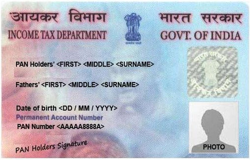

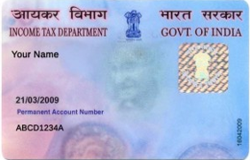

In [7]:
# Display original & user given image
display(original, tampered)

### Reading Images using Opencv

In [8]:
# load the two input images to opencv
original = cv2.imread('id_card_tampering/image/pan_original.png')
tampered = cv2.imread('id_card_tampering/image/pan_tampered.png')

In [9]:
# Convert the images to grayscale using opencv
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

> **Why do we need to convert images to grayscale?** 
> - Because edges of the coloured images can be comple to understand by machine as they have 3 channels.
> - Grayscale only has 1 channel and therefore is easier to process in this case

In [10]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.31686135690489126


> **Why do we need the Structural Similarity Index (SSIM)?** 
> - Structural Similarity Index (SSIM) helps to determine where in terms of x,y coordinates location, the image differences are.
> - It helps find out the similarities between the original and tampered images 
> - The lower the SSIM score, the lower is the similarity.

In [11]:
# Calculating threshold and contours 
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

> **Why do we need the threshold & contours function?** 
> - Threshold is a function of computer vision which applies an adaptive threshold to the image which is stored in the form array
> - Threshold function transforms the grayscale image into a binary image using a mathematical formula
> - Find contours works on binary image and retrive the contours. 
> - Contours are a useful tool for shape analysis and recoginition. 
> - Grab contours grabs the appropriate value of the contours.

In [12]:
# loop over the contours
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

> **Why do we need the bounding rectangle function?** 
> - Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. 
> - We compute the bounding box of the contour and then draw the bounding box on both input images to represent where the two images are different or not.

### Display the Comparision between two images

Original Format Image


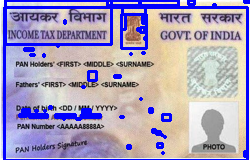

In [13]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered Image


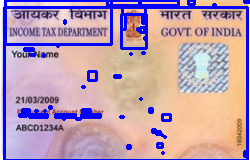

In [14]:
#Diplay tampered image with contour
print('Tampered Image')
Image.fromarray(tampered)

Different Image


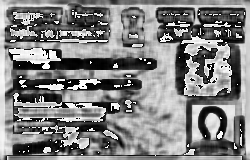

In [15]:
# Diplay difference image, the black part is where the difference is
print('Different Image')
Image.fromarray(diff)

Threshold Image


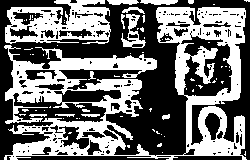

In [16]:
# Diplay difference image with white part
print('Threshold Image')
Image.fromarray(thresh)

### Summary & Scope

**Summary**
- Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images. 
- Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition. 
- As, our SSIM is ~31.2% we can say that the image user provided is fake or tampered.
- Finally we visualized the differences and similarities between the images using by displaying the images with contours, difference and threshold. 

**Scope**
- This project can be used in different organizations where customers or users need to provide any kind of id in order to get themselves verified. 
- The organization can use this project to find out whether the ID is original or fake. Similarly this can be used for any type of ID like adhar, voter id, etc.

## Project Build Up: Package into Functions

In [17]:
hk_id_original = Image.open(requests.get('https://upload.wikimedia.org/wikipedia/en/7/78/2018_onward_HKID_front.png', 
                                   stream=True).raw)

hk_id_fake = Image.open(requests.get('https://www.faketemplate.com/wp-content/uploads/2020/08/hong-kong-id-card-template-01.jpg', 
                                   stream=True).raw)

In [18]:
# Compare the format and size of original & tampered image
print(f"Original image:  format - {hk_id_original.format}, size - {hk_id_original.size}") 
print(f"Tampered image format - {hk_id_fake.format}, size - {hk_id_fake.size}")

Original image:  format - PNG, size - (396, 247)
Tampered image format - JPEG, size - (952, 590)


In [19]:
# Resize and save the two Images
hk_id_original = hk_id_original.resize((350, 220))
hk_id_fake = hk_id_fake.resize((350, 220))

hk_id_original.save('id_card_tampering/image/hk_id_original.png')
hk_id_fake.save('id_card_tampering/image/hk_id_fake.png')

In [20]:
# load the two input images to opencv
original = cv2.imread('id_card_tampering/image/hk_id_original.png')
tampered = cv2.imread('id_card_tampering/image/hk_id_fake.png')

libpng warning: iCCP: known incorrect sRGB profile


In [21]:
def compare_two_images(original, tampered):
    # Convert the images to grayscale using opencv
    original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)
    
    # Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
    (score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
    diff = (diff * 255).astype("uint8")
    print("SSIM: {}\n".format(score))
    
    # Calculating threshold and contours 
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    
    # loop over the contours
    for c in cnts:
        # applying contours on image
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

    #Diplay original image with contour
    print('Original Format Image')
    display(Image.fromarray(original))

    #Diplay tampered image with contour
    print('Tampered Image')
    display(Image.fromarray(tampered))

    # Diplay difference image, the black part is where the difference is
    print('Different Image')
    display(Image.fromarray(diff))

    # Diplay difference image with white part
    print('Threshold Image')
    display(Image.fromarray(thresh))

SSIM: 0.4080553701171513

Original Format Image


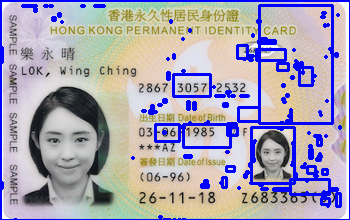

Tampered Image


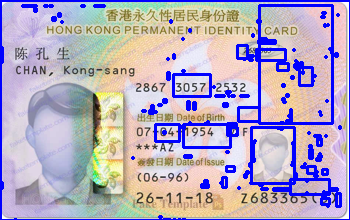

Different Image


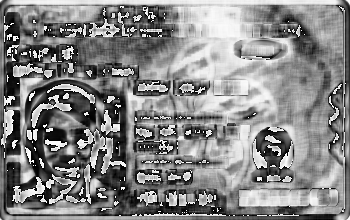

Threshold Image


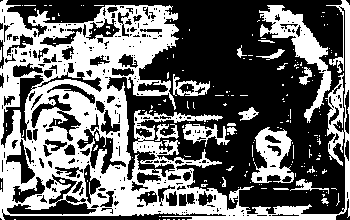

In [22]:
compare_two_images(original, tampered)